In [4]:
!pip install astropy
from astropy.time import Time
!pip install pandas
import pandas as pd
import math
!pip install yfinance
import yfinance as yf
import numpy as np
from scipy import stats
from scipy.stats import kstest
from scipy.stats import norm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
!pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [709]:
path="https://github.com/BinciTsai/DJI-project/blob/ee4a6f2091d9970a8550f218fbf35fd9ab9f3dbe/dja-opt.csv"
df=pd.read_csv(path, on_bad_lines='skip')

In [659]:
#gia
df_G=df[['gan Year','G Month','Differ%']].copy()
df_G.set_index('gan Year', inplace=True)
gialist=['乙', '丙', '丁', '戊', '己', '庚', '辛', '壬', '癸']
df_g=df_G.drop(gialist)
df_gi=df_g.groupby('G Month')
rows={}
max_length=0
for gi_name, gi_df in df_gi:
    gi_df=gi_df.drop(columns=['G Month'])
    flat=gi_df.values.flatten()
    rows[gi_name]=flat
    if len(flat)>max_length:
        max_length=len(flat)
gi_num=len(gi_df.columns)
index=[]
for i in range(max_length//gi_num):
    for col in gi_df.columns:
        index.append(f"{col}_{i}")
for key in rows:
    if len(rows[key])<len(index):
        rows[key]=list(rows[key])+[float('nan')]*(len(index)-len(rows[key]))

df_gia=pd.DataFrame(rows, index=index)
df_gia=df_gia.reset_index(drop=True)
df_gia=df_gia.dropna()

#zee
df_Z=df[['G Year','G Month','Differ%']].copy()
df_Z.set_index('G Year', inplace=True)
zeelist=['丑', '寅', '卯', '辰', '巳', '午', '未', '申', '酉', '戌', '亥']
df_z=df_Z.drop(zeelist)
df_ze=df_z.groupby('G Month')
rows={}
max_length=0
for ze_name, ze_df in df_ze:
    ze_df=ze_df.drop(columns=['G Month'])
    flat=ze_df.values.flatten()
    rows[ze_name]=flat
    if len(flat)>max_length:
        max_length=len(flat)
ze_num=len(ze_df.columns)
index=[]
for i in range(max_length//ze_num):
    for col in ze_df.columns:
        index.append(f"{col}_{i}")
for key in rows:
    if len(rows[key])<len(index):
        rows[key]=list(rows[key])+[float('nan')]*(len(index)-len(rows[key]))

df_zee=pd.DataFrame(rows, index=index)
df_zee=df_zee.reset_index(drop=True)
df_zee=df_zee.dropna()

#giazee mix
df_gz11=pd.concat([df_gia['子'], df_zee['子']],axis=0)
df_gz11=pd.DataFrame(df_gz11)
df_gz11=df_gz11.reset_index(drop=True)
df_gz11=df_gz11.dropna()

In [162]:
!pip install hdbscan
import hdbscan
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [114]:
import matplotlib
matplotlib.rc('font', family='Apple LiGothic')

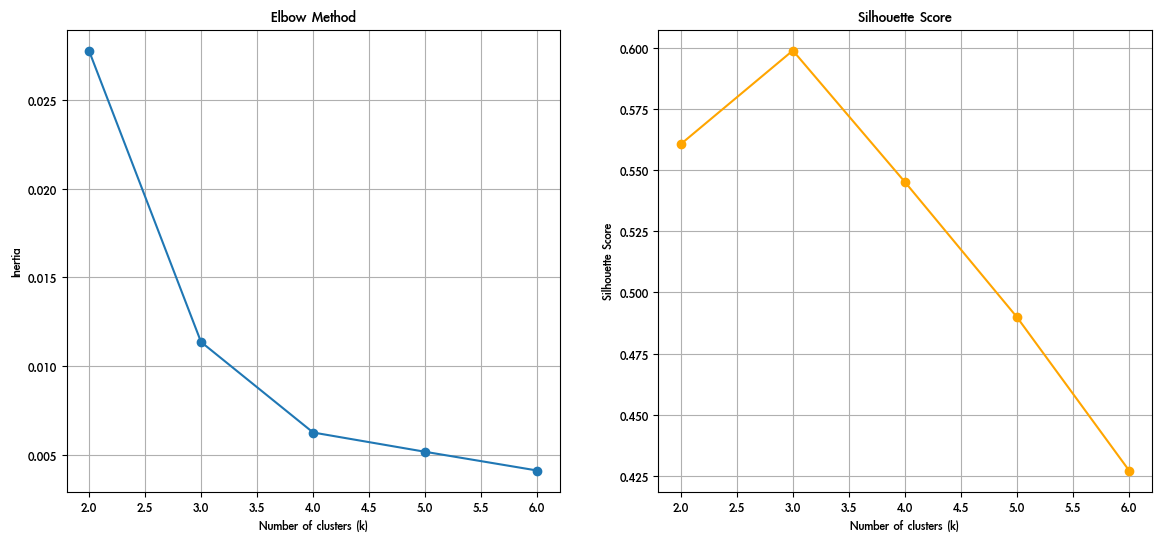

In [597]:
X=df_gz11[['子']]
inertias=[]
silhouettes=[]

k_range=range(2, 7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

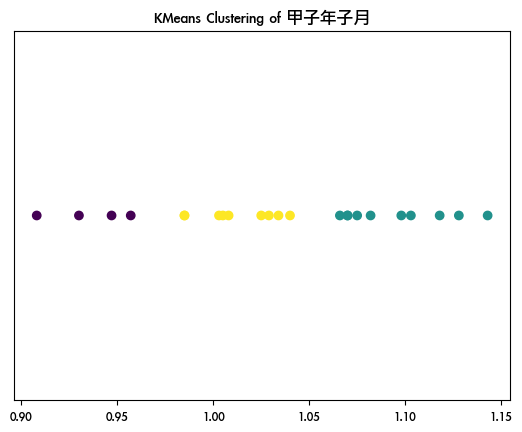

        子  cluster
0   1.143        1
1   1.070        1
2   1.103        1
3   1.005        2
4   1.098        1
5   1.003        2
6   0.930        0
7   0.985        2
8   0.957        0
9   1.040        2
10  1.025        2
11  1.075        1
12  1.128        1
13  1.008        2
14  1.070        1
15  1.034        2
16  0.908        0
17  1.029        2
18  1.066        1
19  0.985        2
20  1.082        1
21  0.947        0
22  1.118        1


In [599]:
X = df_gz11[['子']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_gz11['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz11['子'], [0]*len(df_gz11), c=df_gz11['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年子月')
plt.show()
print(df_gz11)

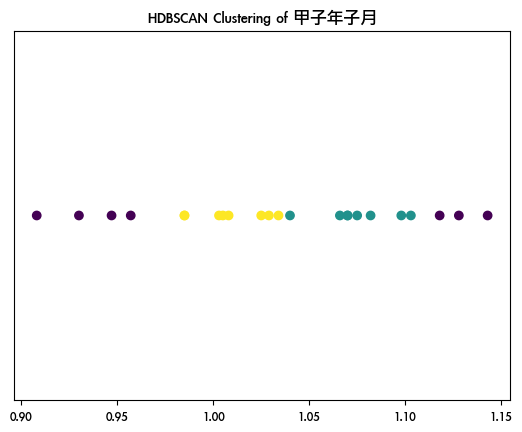

        子  cluster
0   1.143       -1
1   1.070        0
2   1.103        0
3   1.005        1
4   1.098        0
5   1.003        1
6   0.930       -1
7   0.985        1
8   0.957       -1
9   1.040        0
10  1.025        1
11  1.075        0
12  1.128       -1
13  1.008        1
14  1.070        0
15  1.034        1
16  0.908       -1
17  1.029        1
18  1.066        0
19  0.985        1
20  1.082        0
21  0.947       -1
22  1.118       -1


In [661]:
X = df_gz11[['子']]
hdb=hdbscan.HDBSCAN(min_cluster_size=5)
df_gz11['cluster']= hdb.fit_predict(X)

plt.scatter(X, [0]*len(df_gz11), c=df_gz11['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年子月')
plt.yticks([])
plt.show()
print(df_gz11)

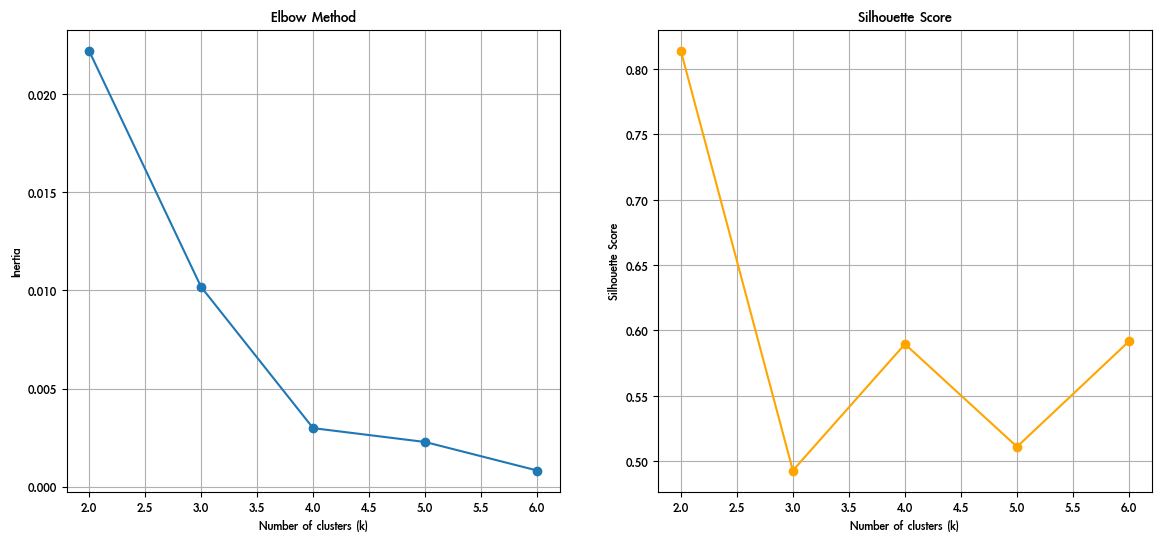

In [603]:
df_gz12=pd.concat([df_gia['丑'], df_zee['丑']],axis=0)
df_gz12=pd.DataFrame(df_gz12)
df_gz12=df_gz12.reset_index(drop=True)
df_gz12=df_gz12.dropna()
X=df_gz12[['丑']]
inertias=[]
silhouettes=[]

k_range=range(2, 7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

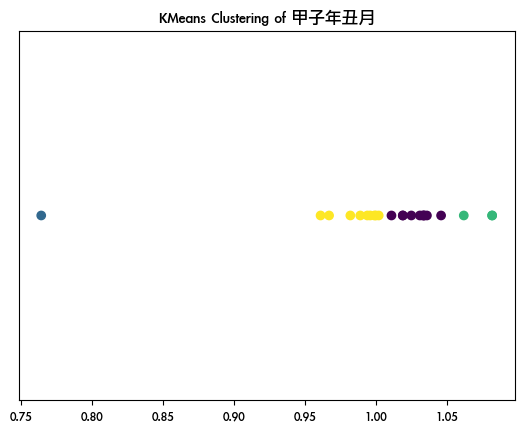

        丑  cluster
0   0.967        3
1   0.764        1
2   1.082        2
3   1.011        0
4   1.034        0
5   1.046        0
6   0.999        3
7   0.996        3
8   1.019        0
9   1.025        0
10  1.034        0
11  1.000        3
12  1.062        2
13  0.961        3
14  1.082        2
15  0.982        3
16  1.036        0
17  1.031        0
18  1.002        3
19  1.019        0
20  0.989        3
21  0.994        3
22  1.033        0


In [605]:
X = df_gz12[['丑']]
kmeans = KMeans(n_clusters=4, random_state=42)
df_gz12['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz12['丑'], [0]*len(df_gz12), c=df_gz12['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年丑月')
plt.show()
print(df_gz12)

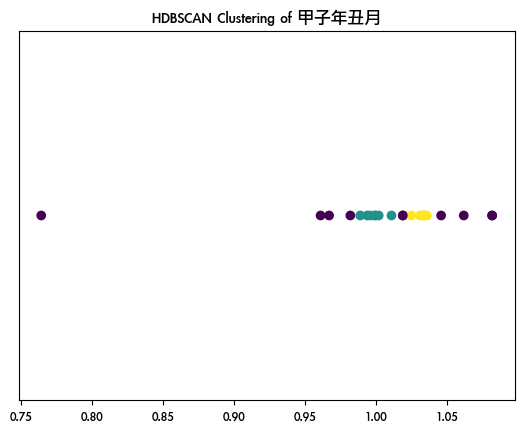

        丑  cluster
0   0.967       -1
1   0.764       -1
2   1.082       -1
3   1.011        0
4   1.034        1
5   1.046       -1
6   0.999        0
7   0.996        0
8   1.019       -1
9   1.025        1
10  1.034        1
11  1.000        0
12  1.062       -1
13  0.961       -1
14  1.082       -1
15  0.982       -1
16  1.036        1
17  1.031        1
18  1.002        0
19  1.019       -1
20  0.989        0
21  0.994        0
22  1.033        1


In [429]:
X = df_gz12[['丑']]
hdb=hdbscan.HDBSCAN(min_cluster_size=5)
df_gz12['cluster']= hdb.fit_predict(X)

plt.scatter(X, [0]*len(df_gz12), c=df_gz12['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年丑月')
plt.yticks([])
plt.show()
print(df_gz12)

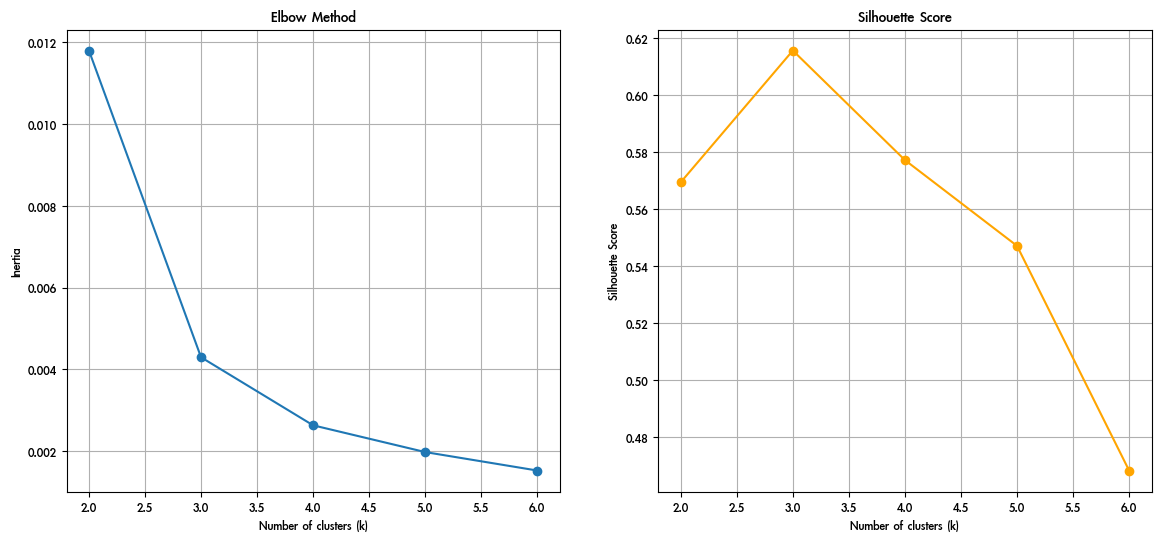

In [663]:
df_gz1=pd.concat([df_gia['寅'], df_zee['寅']],axis=0)
df_gz1=pd.DataFrame(df_gz1)
df_gz1=df_gz1.reset_index(drop=True)
df_gz1=df_gz1.dropna()
X=df_gz1[['寅']]
inertias=[]
silhouettes=[]

k_range=range(2, 7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

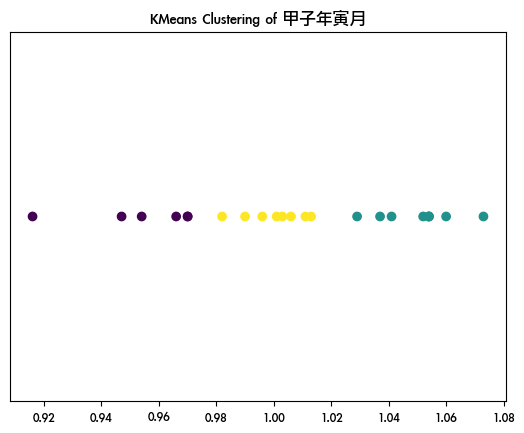

        寅  cluster
0   0.996        2
1   1.052        1
2   1.054        1
3   1.073        1
4   1.011        2
5   1.041        1
6   1.029        1
7   1.006        2
8   0.970        0
9   1.060        1
10  1.003        2
11  0.947        0
12  1.001        2
13  0.982        2
14  1.054        1
15  1.037        1
16  0.966        0
17  0.916        0
18  1.013        2
19  0.970        0
20  1.054        1
21  0.954        0
22  0.990        2


In [665]:
X = df_gz1[['寅']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_gz1['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz1['寅'], [0]*len(df_gz1), c=df_gz1['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年寅月')
plt.show()
print(df_gz1)

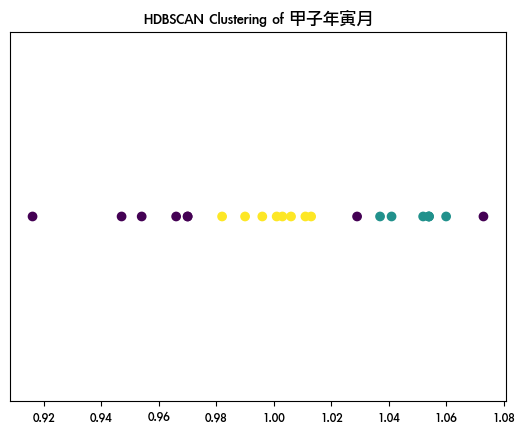

        寅  cluster
0   0.996        1
1   1.052        0
2   1.054        0
3   1.073       -1
4   1.011        1
5   1.041        0
6   1.029       -1
7   1.006        1
8   0.970       -1
9   1.060        0
10  1.003        1
11  0.947       -1
12  1.001        1
13  0.982        1
14  1.054        0
15  1.037        0
16  0.966       -1
17  0.916       -1
18  1.013        1
19  0.970       -1
20  1.054        0
21  0.954       -1
22  0.990        1


In [667]:
X = df_gz1[['寅']]
hdb=hdbscan.HDBSCAN(min_cluster_size=7)
df_gz1['cluster']= hdb.fit_predict(X)

plt.scatter(X, [0]*len(df_gz1), c=df_gz1['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年寅月')
plt.yticks([])
plt.show()
print(df_gz1)

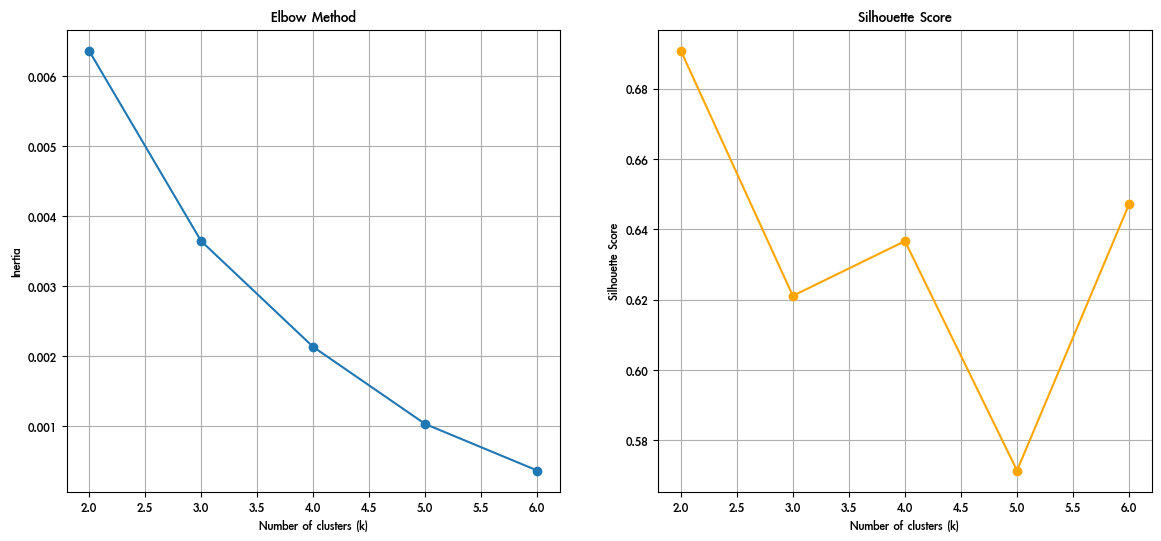

In [613]:
df_gz2=pd.concat([df_gia['卯'], df_zee['卯']],axis=0)
df_gz2=pd.DataFrame(df_gz2)
df_gz2=df_gz2.reset_index(drop=True)
df_gz2=df_gz2.dropna()
X=df_gz2[['卯']]
inertias=[]
silhouettes=[]

k_range=range(2, 7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

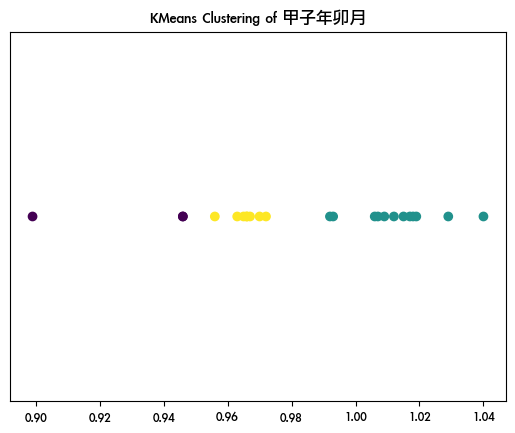

        卯  cluster
0   0.972        2
1   0.993        1
2   0.966        2
3   0.965        2
4   0.992        1
5   1.007        1
6   1.019        1
7   1.006        1
8   0.946        0
9   0.963        2
10  1.009        1
11  1.040        1
12  0.967        2
13  1.015        1
14  0.966        2
15  1.018        1
16  0.956        2
17  1.012        1
18  1.029        1
19  0.946        0
20  1.017        1
21  0.970        2
22  0.899        0


In [615]:
X = df_gz2[['卯']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_gz2['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz2['卯'], [0]*len(df_gz2), c=df_gz2['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年卯月')
plt.show()
print(df_gz2)

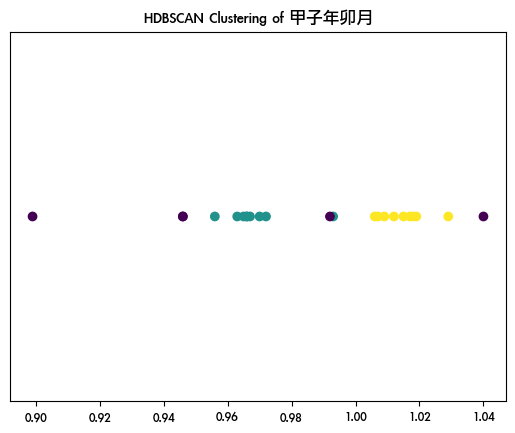

        卯  cluster
0   0.972        0
1   0.993        0
2   0.966        0
3   0.965        0
4   0.992       -1
5   1.007        1
6   1.019        1
7   1.006        1
8   0.946       -1
9   0.963        0
10  1.009        1
11  1.040       -1
12  0.967        0
13  1.015        1
14  0.966        0
15  1.018        1
16  0.956        0
17  1.012        1
18  1.029        1
19  0.946       -1
20  1.017        1
21  0.970        0
22  0.899       -1


In [617]:
X = df_gz2[['卯']]
hdb=hdbscan.HDBSCAN(min_cluster_size=9)
df_gz2['cluster']= hdb.fit_predict(X)

plt.scatter(X, [0]*len(df_gz2), c=df_gz2['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年卯月')
plt.yticks([])
plt.show()
print(df_gz2)

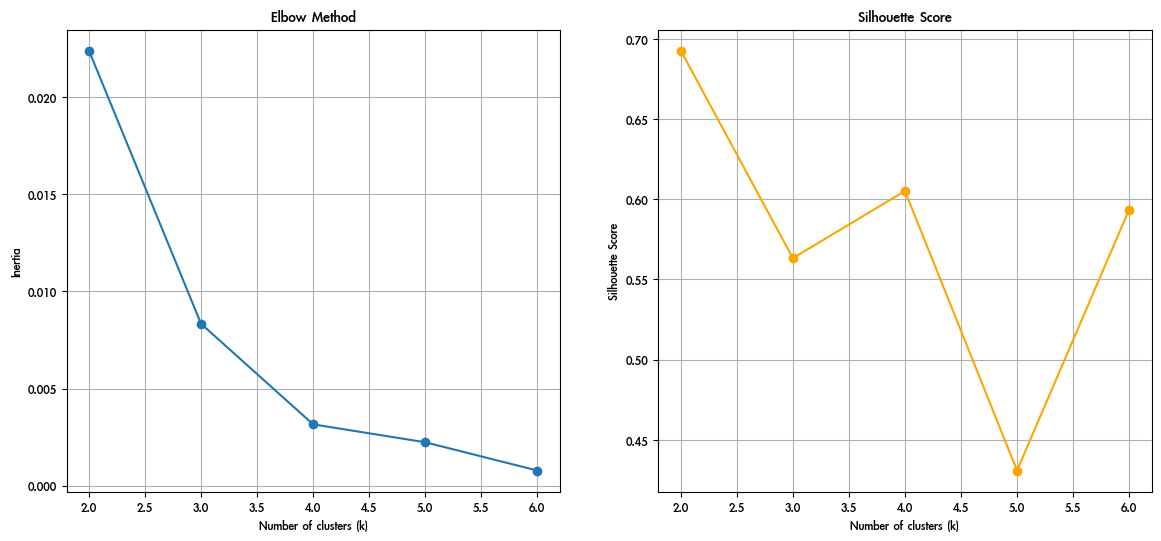

In [619]:
df_gz3=pd.concat([df_gia['辰'], df_zee['辰']],axis=0)
df_gz3=pd.DataFrame(df_gz3)
df_gz3=df_gz3.reset_index(drop=True)
df_gz3=df_gz3.dropna()
X=df_gz3[['辰']]
inertias=[]
silhouettes=[]

k_range=range(2,7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

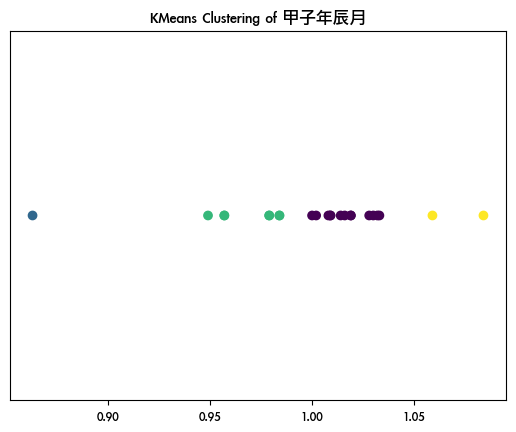

        辰  cluster
0   1.033        0
1   1.002        0
2   0.957        2
3   0.984        2
4   1.019        0
5   1.030        0
6   1.016        0
7   0.984        2
8   1.009        0
9   0.949        2
10  0.979        2
11  1.008        0
12  1.032        0
13  1.084        3
14  0.957        2
15  1.028        0
16  1.059        3
17  0.979        2
18  1.014        0
19  1.009        0
20  1.019        0
21  1.000        0
22  0.863        1


In [621]:
X = df_gz3[['辰']]
kmeans = KMeans(n_clusters=4, random_state=42)
df_gz3['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz3['辰'], [0]*len(df_gz3), c=df_gz3['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年辰月')
plt.show()
print(df_gz3)

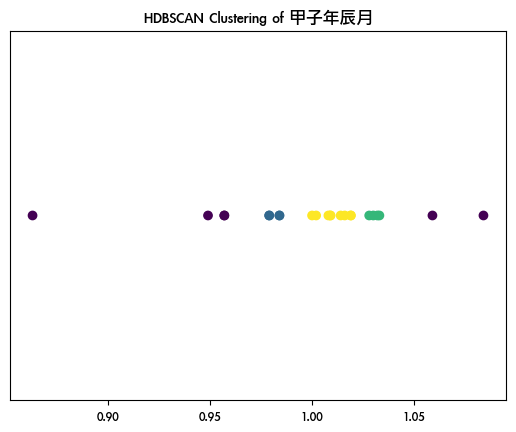

        辰  cluster
0   1.033        1
1   1.002        2
2   0.957       -1
3   0.984        0
4   1.019        2
5   1.030        1
6   1.016        2
7   0.984        0
8   1.009        2
9   0.949       -1
10  0.979        0
11  1.008        2
12  1.032        1
13  1.084       -1
14  0.957       -1
15  1.028        1
16  1.059       -1
17  0.979        0
18  1.014        2
19  1.009        2
20  1.019        2
21  1.000        2
22  0.863       -1


In [623]:
X = df_gz3[['辰']]
hdb=hdbscan.HDBSCAN(min_cluster_size=3)
df_gz3['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz3['辰'], [0]*len(df_gz3), c=df_gz3['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年辰月')
plt.yticks([])
plt.show()
print(df_gz3)

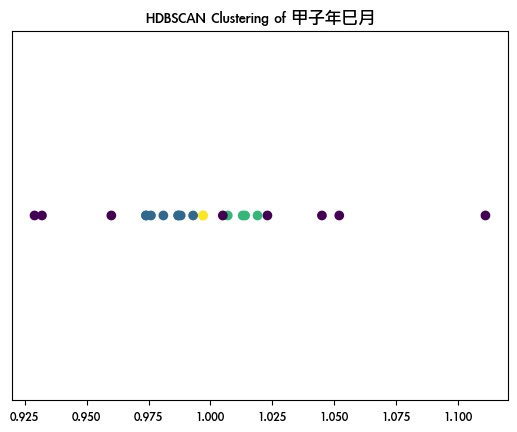

        巳  cluster
0   0.993        0
1   0.960       -1
2   0.974        0
3   0.987        0
4   0.981        0
5   1.052       -1
6   0.997        2
7   0.988        0
8   1.005        2
9   1.013        1
10  0.987        0
11  1.007        1
12  0.929       -1
13  1.023       -1
14  0.974        0
15  0.932       -1
16  1.019        1
17  0.976        0
18  1.014        1
19  1.005       -1
20  0.997        2
21  1.045       -1
22  1.111       -1


In [625]:
df_gz4=pd.concat([df_gia['巳'], df_zee['巳']],axis=0)
df_gz4=pd.DataFrame(df_gz4)
df_gz4=df_gz4.reset_index(drop=True)
df_gz4=df_gz4.dropna()
X=df_gz4[['巳']]

hdb=hdbscan.HDBSCAN(min_cluster_size=3)
df_gz4['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz4['巳'], [0]*len(df_gz4), c=df_gz4['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年巳月')
plt.yticks([])
plt.show()
print(df_gz4)

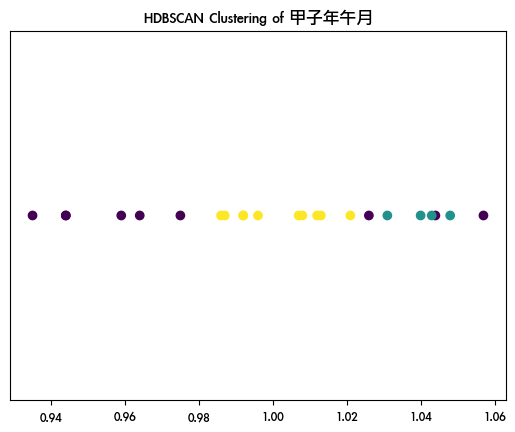

        午  cluster
0   0.987        1
1   1.031        0
2   0.992        1
3   0.935       -1
4   1.044       -1
5   1.026       -1
6   1.012        1
7   0.959       -1
8   0.944       -1
9   1.021        1
10  0.996        1
11  1.008        1
12  0.964       -1
13  0.975       -1
14  0.992        1
15  1.048        0
16  1.057       -1
17  1.040        0
18  1.007        1
19  0.944       -1
20  1.013        1
21  0.986        1
22  1.043        0


In [627]:
df_gz=pd.concat([df_gia['午'], df_zee['午']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz5=df_gz.dropna()
X=df_gz5[['午']]

hdb=hdbscan.HDBSCAN(min_cluster_size=4)
df_gz5['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz5['午'], [0]*len(df_gz5), c=df_gz5['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年午月')
plt.yticks([])
plt.show()
print(df_gz5)

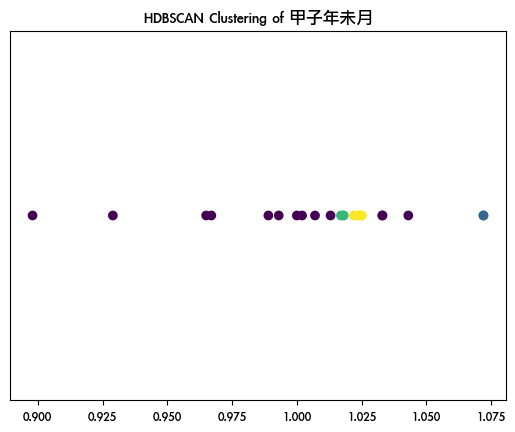

        未  cluster
0   1.022        2
1   0.989       -1
2   1.072        0
3   1.018        1
4   1.043       -1
5   1.018        1
6   1.013       -1
7   1.000       -1
8   1.025        2
9   0.965       -1
10  1.024        2
11  1.007       -1
12  0.929       -1
13  1.033       -1
14  1.072        0
15  1.033       -1
16  0.993       -1
17  1.024        2
18  0.967       -1
19  1.025        2
20  1.002       -1
21  0.898       -1
22  1.017        1


In [629]:
df_gz=pd.concat([df_gia['未'], df_zee['未']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz6=df_gz.dropna()
X=df_gz6[['未']]

hdb=hdbscan.HDBSCAN(min_cluster_size=2)
df_gz6['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz6['未'], [0]*len(df_gz6), c=df_gz6['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年未月')
plt.yticks([])
plt.show()
print(df_gz6)

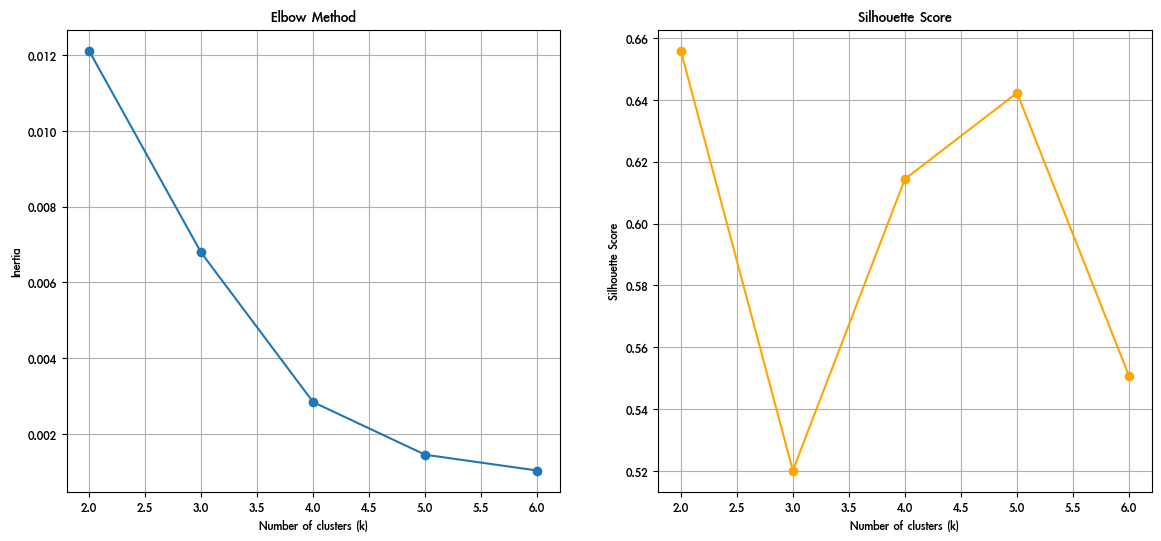

In [631]:
df_gz=pd.concat([df_gia['未'], df_zee['未']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz6=df_gz.dropna()
X=df_gz6[['未']]
inertias=[]
silhouettes=[]

k_range=range(2,7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

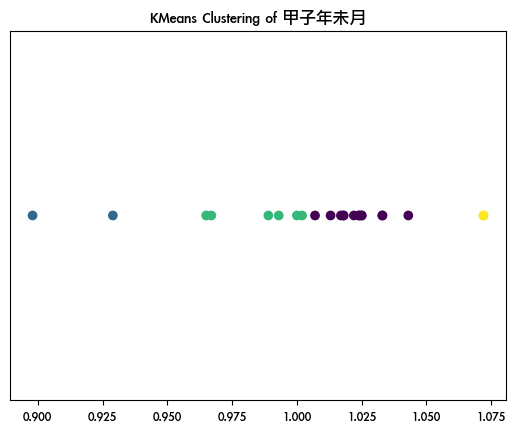

        未  cluster
0   1.022        0
1   0.989        2
2   1.072        3
3   1.018        0
4   1.043        0
5   1.018        0
6   1.013        0
7   1.000        2
8   1.025        0
9   0.965        2
10  1.024        0
11  1.007        0
12  0.929        1
13  1.033        0
14  1.072        3
15  1.033        0
16  0.993        2
17  1.024        0
18  0.967        2
19  1.025        0
20  1.002        2
21  0.898        1
22  1.017        0


In [633]:
X = df_gz6[['未']]
kmeans = KMeans(n_clusters=4, random_state=42)
df_gz6['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz6['未'], [0]*len(df_gz6), c=df_gz6['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年未月')
plt.show()
print(df_gz6)

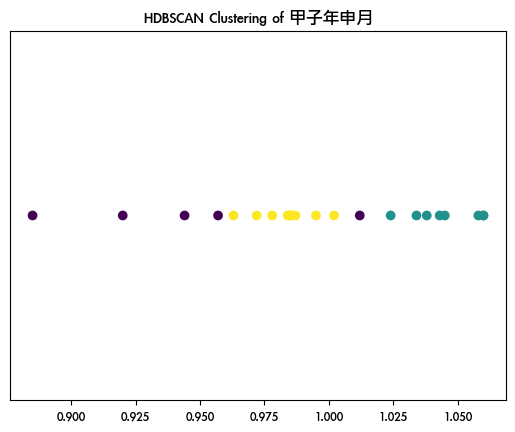

        申  cluster
0   1.058        0
1   0.885       -1
2   1.060        0
3   0.920       -1
4   0.985        1
5   1.043        0
6   1.012       -1
7   0.944       -1
8   0.985        1
9   1.038        0
10  0.972        1
11  0.984        1
12  1.034        0
13  0.987        1
14  1.060        0
15  1.045        0
16  0.957       -1
17  0.963        1
18  0.995        1
19  0.985        1
20  0.978        1
21  1.002        1
22  1.024        0


In [635]:
df_gz=pd.concat([df_gia['申'], df_zee['申']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz7=df_gz.dropna()
X=df_gz7[['申']]

hdb=hdbscan.HDBSCAN(min_cluster_size=5)
df_gz7['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz7['申'], [0]*len(df_gz7), c=df_gz7['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年申月')
plt.yticks([])
plt.show()
print(df_gz7)

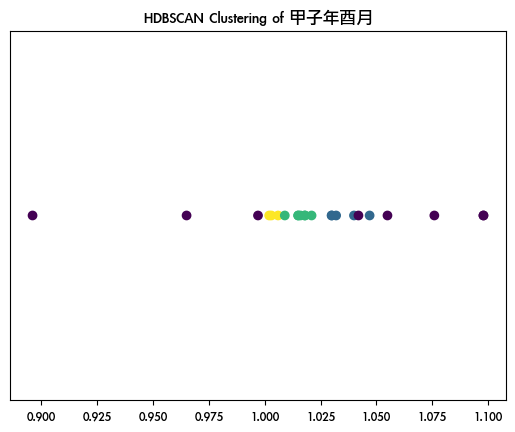

        酉  cluster
0   1.047        0
1   1.030        0
2   1.055       -1
3   1.006        2
4   0.965       -1
5   0.997       -1
6   0.896       -1
7   1.098       -1
8   1.040        0
9   1.003        2
10  1.032        0
11  1.018        1
12  1.018        1
13  1.021        1
14  1.030        0
15  1.009        1
16  1.002        2
17  1.015        1
18  1.042       -1
19  1.098       -1
20  1.016        1
21  1.015        1
22  1.076       -1


In [637]:
df_gz=pd.concat([df_gia['酉'], df_zee['酉']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz8=df_gz.dropna()
X=df_gz8[['酉']]

hdb=hdbscan.HDBSCAN(min_cluster_size=3)
df_gz8['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz8['酉'], [0]*len(df_gz8), c=df_gz8['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年酉月')
plt.yticks([])
plt.show()
print(df_gz8)

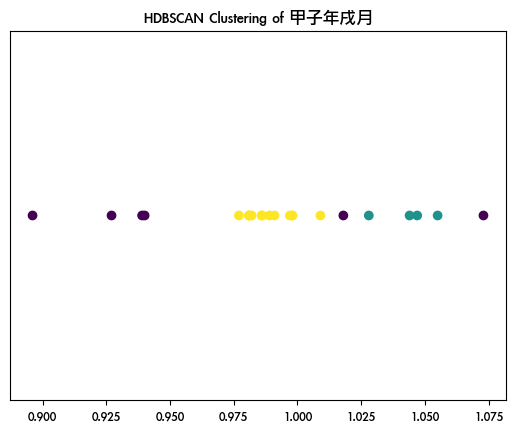

        戌  cluster
0   1.055        0
1   0.981        1
2   0.998        1
3   0.998        1
4   1.073       -1
5   1.044        0
6   0.896       -1
7   0.986        1
8   0.982        1
9   0.991        1
10  0.997        1
11  1.018       -1
12  0.939       -1
13  1.028        0
14  0.981        1
15  1.009        1
16  0.981        1
17  0.927       -1
18  0.989        1
19  0.986        1
20  1.047        0
21  0.940       -1
22  0.977        1


In [639]:
df_gz=pd.concat([df_gia['戌'], df_zee['戌']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz9=df_gz.dropna()
X=df_gz9[['戌']]

hdb=hdbscan.HDBSCAN(min_cluster_size=3)
df_gz9['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz9['戌'], [0]*len(df_gz9), c=df_gz9['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年戌月')
plt.yticks([])
plt.show()
print(df_gz9)

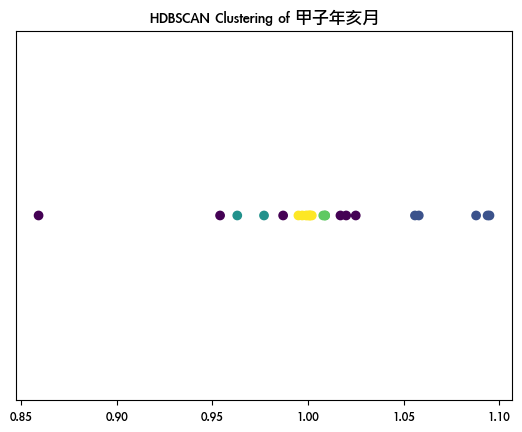

        亥  cluster
0   1.094        0
1   1.009        2
2   1.008        2
3   0.999        3
4   0.977        1
5   0.997        3
6   1.095        0
7   1.001        3
8   1.017       -1
9   0.995        3
10  1.020       -1
11  0.987       -1
12  1.088        0
13  0.963        1
14  1.009        2
15  1.056        0
16  1.058        0
17  1.000        3
18  1.002        3
19  1.001        3
20  1.025       -1
21  0.859       -1
22  0.954       -1


In [641]:
df_gz=pd.concat([df_gia['亥'], df_zee['亥']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz10=df_gz.dropna()
X=df_gz10[['亥']]

hdb=hdbscan.HDBSCAN(min_cluster_size=2)
df_gz10['cluster']= hdb.fit_predict(X)

plt.scatter(df_gz10['亥'], [0]*len(df_gz10), c=df_gz10['cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering of 甲子年亥月')
plt.yticks([])
plt.show()
print(df_gz10)

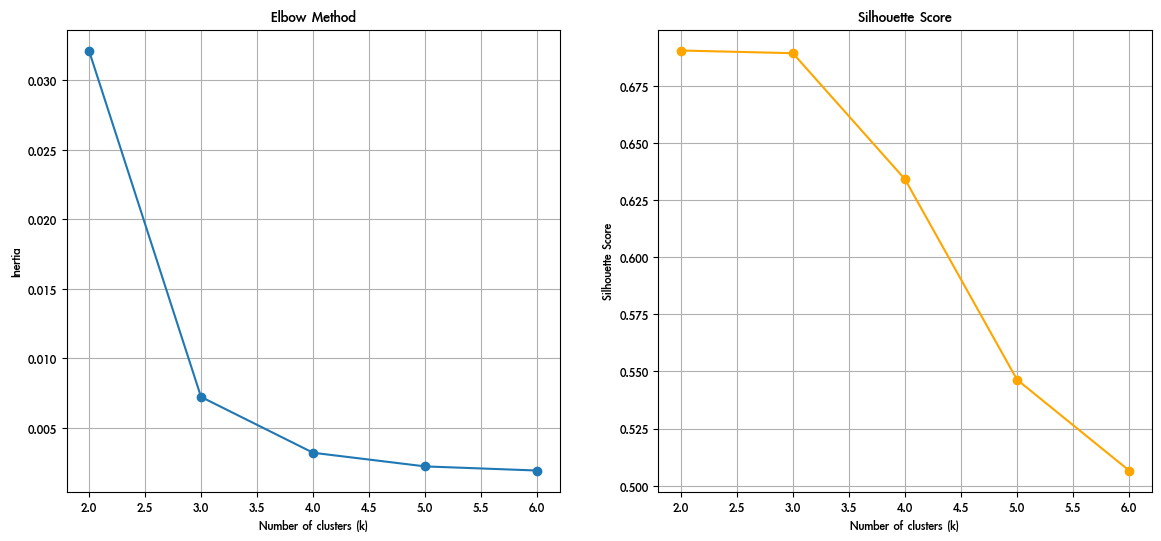

In [643]:
df_gz=pd.concat([df_gia['亥'], df_zee['亥']],axis=0)
df_gz=pd.DataFrame(df_gz)
df_gz=df_gz.reset_index(drop=True)
df_gz10=df_gz.dropna()
X=df_gz10[['亥']]
inertias=[]
silhouettes=[]

k_range=range(2,7)
for k in k_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    labels=kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()

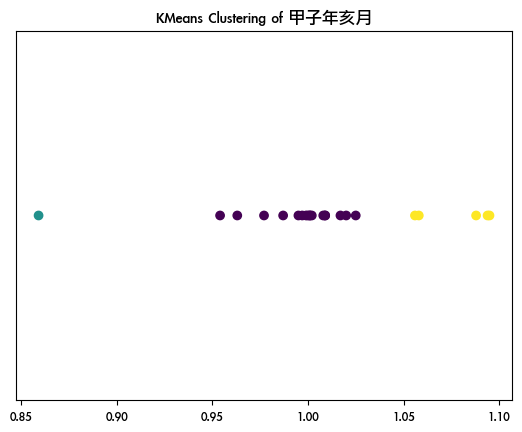

        亥  cluster
0   1.094        2
1   1.009        0
2   1.008        0
3   0.999        0
4   0.977        0
5   0.997        0
6   1.095        2
7   1.001        0
8   1.017        0
9   0.995        0
10  1.020        0
11  0.987        0
12  1.088        2
13  0.963        0
14  1.009        0
15  1.056        2
16  1.058        2
17  1.000        0
18  1.002        0
19  1.001        0
20  1.025        0
21  0.859        1
22  0.954        0


In [645]:
X=df_gz10[['亥']]
kmeans=KMeans(n_clusters=3, random_state=42)
df_gz10['cluster'] = kmeans.fit_predict(X)
plt.scatter(df_gz10['亥'], [0]*len(df_gz10), c=df_gz10['cluster'], cmap='viridis')
plt.yticks([])
plt.title('KMeans Clustering of 甲子年亥月')
plt.show()
print(df_gz10)

In [671]:
adf_gz1=df_gz1[df_gz1['cluster'] != -1].drop(columns='cluster')
adf_gz1.reset_index(inplace=True)
adf_gz2=df_gz2[df_gz2['cluster'] != -1].drop(columns='cluster')
adf_gz2.reset_index(inplace=True)
adf_gz3=df_gz3[df_gz3['cluster'] != -1].drop(columns='cluster')
adf_gz3.reset_index(inplace=True)
adf_gz4=df_gz4[df_gz4['cluster'] != -1].drop(columns='cluster')
adf_gz4.reset_index(inplace=True)
adf_gz5=df_gz5[df_gz5['cluster'] != -1].drop(columns='cluster')
adf_gz5.reset_index(inplace=True)
adf_gz7=df_gz7[df_gz7['cluster'] != -1].drop(columns='cluster')
adf_gz7.reset_index(inplace=True)
adf_gz8=df_gz8[df_gz8['cluster'] != -1].drop(columns='cluster')
adf_gz8.reset_index(inplace=True)
adf_gz9=df_gz9[df_gz9['cluster'] != -1].drop(columns='cluster')
adf_gz9.reset_index(inplace=True)
adf_gz11=df_gz11[df_gz11['cluster'] != -1].drop(columns='cluster')
adf_gz11.reset_index(inplace=True)

adf_gz6=df_gz6[df_gz6['cluster'] != 1]
adf_gz6=df_gz6[df_gz6['cluster'] != 3].drop(columns='cluster')
adf_gz6.reset_index(inplace=True)
adf_gz10=df_gz10[df_gz10['cluster'] != 1].drop(columns='cluster')
adf_gz10.reset_index(inplace=True)
adf_gz12=df_gz12[df_gz12['cluster'] != 1].drop(columns='cluster')
adf_gz12.reset_index(inplace=True)

In [679]:
dfgz_11=pd.concat([adf_gz1, adf_gz2, adf_gz3, adf_gz4, adf_gz5, adf_gz6, adf_gz7, adf_gz8, adf_gz9, adf_gz10, adf_gz11, adf_gz12], axis=1)
dfgz_11=dfgz_11.drop(columns='index')
dfgz_11.head(30)

,寅,卯,辰,巳,午,未,申,酉,戌,亥,子,丑
0,0.996,0.972,1.033,0.993,0.987,1.022,1.058,1.047,1.055,1.094,1.070,0.967
1,1.052,0.993,1.002,0.974,1.031,0.989,1.060,1.030,0.981,1.009,1.103,1.082
2,1.054,0.966,0.984,0.987,0.992,1.018,0.985,1.006,0.998,1.008,1.005,1.011
3,1.011,0.965,1.019,0.981,1.012,1.043,1.043,1.040,0.998,0.999,1.098,1.034
4,1.041,1.007,1.030,0.997,1.021,1.018,0.985,1.003,1.044,0.977,1.003,1.046
5,1.006,1.019,1.016,0.988,0.996,1.013,1.038,1.032,0.986,0.997,0.985,0.999
6,1.060,1.006,0.984,1.005,1.008,1.000,0.972,1.018,0.982,1.095,1.040,0.996
7,1.003,0.963,1.009,1.013,0.992,1.025,0.984,1.018,0.991,1.001,1.025,1.019
8,1.001,1.009,0.979,0.987,1.048,0.965,1.034,1.021,0.997,1.017,1.075,1.025
9,0.982,0.967,1.008,1.007,1.040,1.024,0.987,1.030,1.028,0.995,1.008,1.034


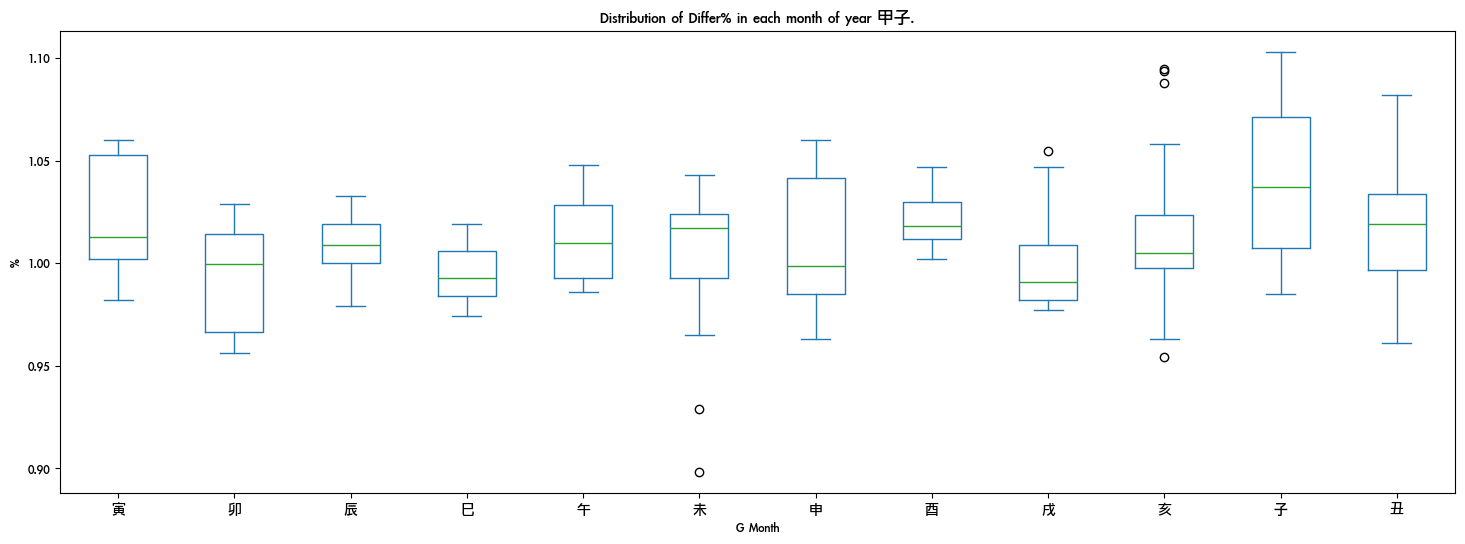

In [681]:
dfgz_11.plot(kind='box', figsize=(18, 6))
plt.xticks(rotation=360)
plt.xlabel('G Month')
plt.ylabel('%')
plt.title('Distribution of Differ% in each month of year 甲子.')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Apple LiGothic.
  fig.canvas.print_figure(bytes_io, **kw)


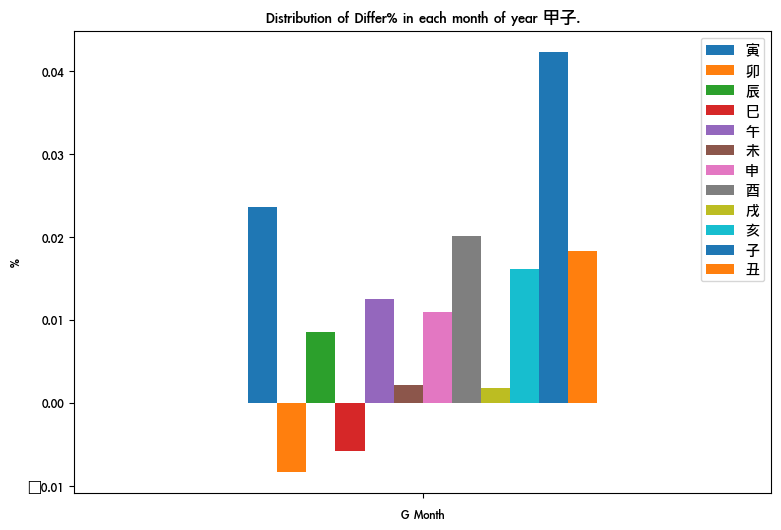

In [689]:
dfgz_11m=dfgz_11.mean().to_frame(name='')
dfgz_11m=dfgz_11m-1
dfgz_11m=dfgz_11m.transpose()

dfgz_11m.plot(kind='bar', figsize=(9, 6))
plt.xticks(rotation=360)
plt.xlabel('G Month')
plt.ylabel('%')
plt.title('Distribution of Differ% in each month of year 甲子.')
plt.show()